# Assignment 01: Learning from Data and Realted Challenges and Linear Models for Regression

author : *Sasika Amarasinghe*

date : *03.09.2024*

index no : *210035A*

___
### 1 Data pre-processing


**Q1.** Feature values of two features is shown in Fig.1. Considering the scaling methods
of (a) standard scaling, (b) min-max scaling, and (c) max-abs scaling. Select one
scaling method for feature 1 and 2, ensuring that the chosen method preserves the
structure/properties of the features. Justify your answer.

- Feature 1 : _Max-absolute scaling_ Most of the data points in Feature 1 are 0(sparse). There are non-zero values also.
- Feature 2: _Min-max scaling_ Most of the datapoints are distributed between -40 and 40. There seem no outliers. This normalization method will not harm the structure of the data.

___
## 2 Learning from data

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 100

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 3X + epsilon 
Y = 3 + 2 * X + epsilon[:, np.newaxis]

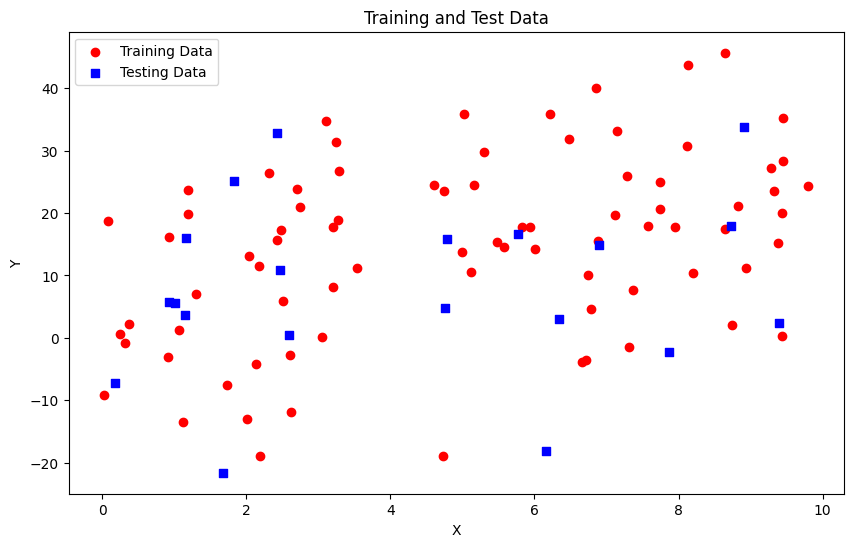

In [72]:
r = np.random.randint(104)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)

# Plot the data points 
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.legend(loc='upper left')
plt.title('Training and Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Q2**. Why training and testing data is different in each run?

The datapoints are fixed in space. However, the data is split randomly using a random value as the random state. Therefore training and testing data is different in each run. If we keep the random_state value as a constant, the training and testing data will be the same in each run.

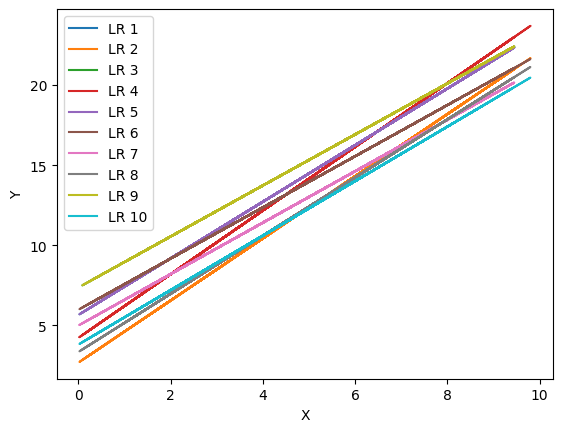

In [73]:
for i in range(10): # Plotting 10 different instances
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, \
                                                        random_state=np.random.randint(104))
  model = LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred_train = model.predict(X_train)
  plt.plot(X_train, Y_pred_train, label=f"LR {i+1}")
  
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**Q3**. Why linear regression model is different from one instance to other instance? 

From instance to instance datapoints categorised for training and test data are different. This results in different parameter values in linear regression model in each run.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 10000

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 3X + epsilon 
Y = 3 + 2 * X + epsilon[:, np.newaxis]

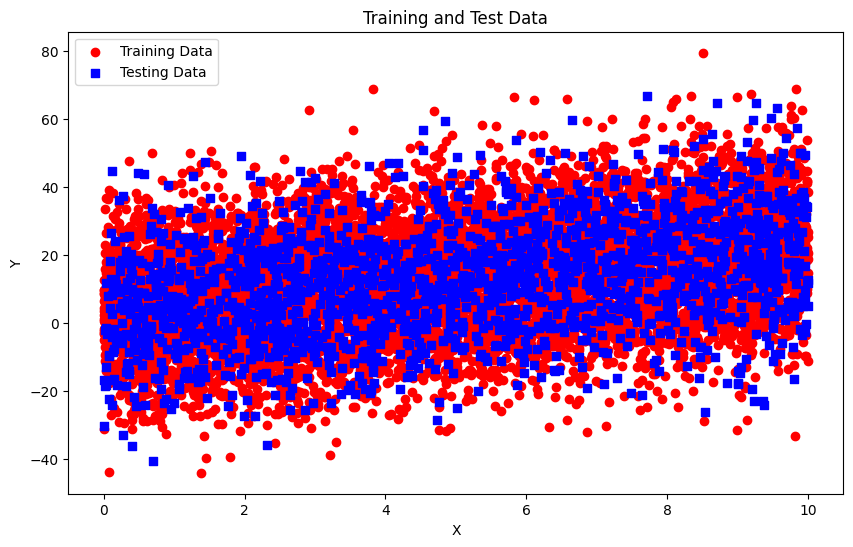

In [75]:
r = np.random.randint(104)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)

# Plot the data points 
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.legend(loc='upper left')
plt.title('Training and Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

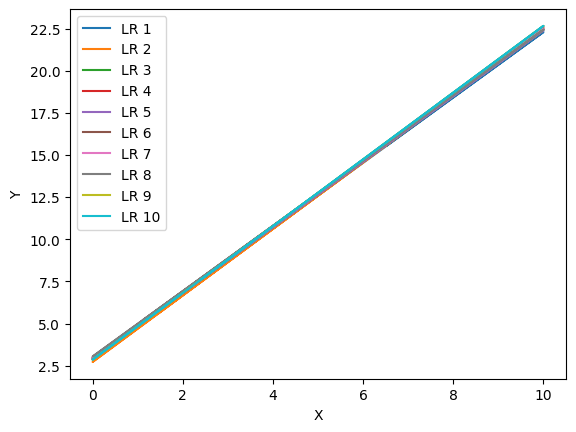

In [76]:
for i in range(10): # Plotting 10 different instances
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, \
                                                        random_state=np.random.randint(104))
  model = LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred_train = model.predict(X_train)
  plt.plot(X_train, Y_pred_train, label=f"LR {i+1}")
  
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**Q4**. Increase the number of data samples to 10,000 (n_samples = 10000 in listing 1) and
repeat the task 3. What is your observation in comparison to 100 data samples ?
State a reason for the different behavior compared to 100 data samples. 

The deviations in each instance is less. They seem to converge to a single line. Since large number of sample are used, the sampled distrubution becomes more and more closely related to the actual distribution.

___
## 3 Linear regression on real world data

In [77]:
# !pip install ucimlrepo

In [78]:
# listing 4: Load data

# If package not installed, install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets 

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [79]:
X.shape, y.shape

((1020, 33), (1020, 2))

**Q2**. How many independent variables and dependent variables are there in the data set?

* 33 independent variables and 2 dependent variables
* `aveOralF` and `aveOralM` are dependent variables

**Q3**. Is it possible to apply linear regression on this dataset? If not, what steps would you
follow before applying linear regression?

- No
- The non-numerical values should be converted to numerical values. (Categorical values in this case) The missing values should be handled. 
- It is better if the data is normalized.

**Q4**. Code given in is used to remove NaN/missing values. Is this a correct approach? If not correct it.
```python
# Listing 5: Data Cleaning
# Drop rows with missing values from both X and y
X = X.dropna()
y = y.dropna()
```

- no
- In X and y there can be rows with missing values. If we drop rows with missing values from both X and y separately, data will not be aligned.

In [80]:
# Listing 5: Data  ( Corrected)
# Drop rows with missing values from both X and y
import pandas as pd

# Combine X and y to ensure corresponding rows are dropped together
data = pd.concat([X, y], axis=1)

# Drop rows with any missing values
data = data.dropna()

# Split X and y back
X = data.iloc[:, :-2]  # All columns except the last one
y = data.iloc[:, -2:]   # The last column (assuming y is a single column)


In [81]:
print(X.shape, y.shape)

(1018, 33) (1018, 2)


In [82]:
y.head(3)

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34


In [83]:
y = y.iloc[:, 1:] 
y.head(3) 

,aveOralM
0,36.59
1,37.19
2,37.34


In [84]:
X.columns

Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1'],
      dtype='object')

**Q5** Selecting `aveOralM` as the dependent feature and `Age`, `T_atm`, `Gender`, `Ethnicity`, `T_OR_Max1` as independent features.

In [85]:
X_a = X[["Age", "T_atm", "Gender", "Ethnicity", "T_OR_Max1"]]
X_a.head()

,Age,T_atm,Gender,Ethnicity,T_OR_Max1
0,41-50,24.0,Male,White,35.6525
1,31-40,24.0,Female,Black or African-American,35.1075
2,21-30,24.0,Female,White,35.8850
3,21-30,24.0,Female,Black or African-American,34.9825
4,18-20,24.0,Male,White,35.6175


In [86]:
# Convert non-numerical values to numerical values
X_a_encoded = pd.get_dummies(X_a[["Age","T_atm", "Gender", "Ethnicity", "T_OR_Max1"]], drop_first=True)
X_a_encoded.head()

,T_atm,T_OR_Max1,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60,Gender_Male,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,24.0,35.6525,False,False,False,False,True,False,False,True,False,False,False,False,True
1,24.0,35.1075,False,False,False,True,False,False,False,False,False,True,False,False,False
2,24.0,35.8850,False,True,False,False,False,False,False,False,False,False,False,False,True
3,24.0,34.9825,False,True,False,False,False,False,False,False,False,True,False,False,False
4,24.0,35.6175,False,False,False,False,False,False,False,True,False,False,False,False,True


In [87]:
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a_encoded, y, test_size=0.2, random_state=42)

In [88]:
X_a_train.shape, y_a_train.shape

((814, 15), (814, 1))

In [89]:
X_a_train.head()

,T_atm,T_OR_Max1,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60,Gender_Male,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
137,24.1,36.0175,True,False,False,False,False,False,False,False,False,True,False,False,False
780,24.7,35.6175,False,False,False,False,False,False,False,True,False,False,False,False,True
754,24.1,36.8350,True,False,False,False,False,False,False,True,False,True,False,False,False
289,24.8,35.9550,False,False,False,False,False,False,False,True,False,True,False,False,False
899,23.9,35.7850,True,False,False,False,False,False,False,True,False,False,False,False,True


In [90]:
from sklearn.metrics import mean_squared_error
model_a = LinearRegression()
model_a.fit(X_a_train, y_a_train)

# Evaluate the model
mse_a = mean_squared_error(y_a_test, model_a.predict(X_a_test))
print(f"Mean Squared Error of model A : {mse_a}")

Mean Squared Error of model A : 0.08880080391735162


In [91]:
# Estimated coefficients by Linear Regression 

weights_a_df = pd.DataFrame({
  "feature": X_a_train.columns,
  "weight": model_a.coef_[0]
})

print(weights_a_df)

print(f"Intercept(Bias): {model_a.intercept_}")

                                feature    weight
0                                 T_atm -0.035413
1                             T_OR_Max1  0.747023
2                             Age_21-25 -0.031187
3                             Age_21-30  0.022034
4                             Age_26-30 -0.063067
5                             Age_31-40 -0.060925
6                             Age_41-50 -0.123815
7                             Age_51-60  0.100808
8                               Age_>60 -0.130127
9                           Gender_Male -0.002556
10                      Ethnicity_Asian -0.035507
11  Ethnicity_Black or African-American  0.013377
12            Ethnicity_Hispanic/Latino -0.108620
13                Ethnicity_Multiracial -0.053804
14                      Ethnicity_White -0.103165
Intercept(Bias): [11.19735878]


**Q8**. Which independent variable contributes highly for the dependent feature?

Out of the features I selected `T_OR_Max1` has the highest contribution to the independent variable. Because the coefficient of `T_OR_Max1` is the largest absolute value of coefficients.

**Q9**. Select `T_OR1`, `T_OR_Max1`, `T_FHC_Max1`, `T_FH_Max1` features as independent features. Train a linear regression model and estimate the coefficient corresponds to independent variables.

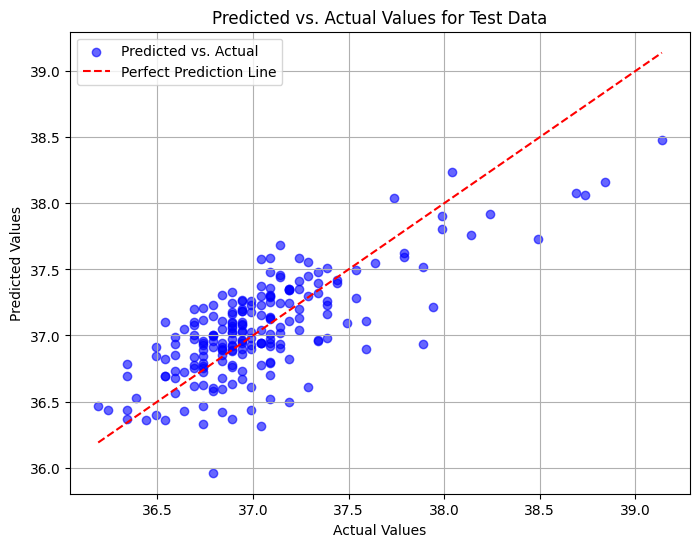

In [92]:
# Predict on the test set 
y_a_pred = model_a.predict(X_a_test)

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_a_test, y_a_pred, alpha=0.6, color='b', label='Predicted vs. Actual')
plt.plot([y_a_test.min(), y_a_test.max()], [y_a_test.min(), y_a_test.max()], color='r',\
  linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values for Test Data')
plt.legend()
plt.grid(True)
plt.show()


It is apparent that the predicted points are somewhat deviated when the actual value is high. Therefore we have to choose another reliable features for the linear regression model.

In [93]:
X_b = X[["T_OR1", "T_OR_Max1", "T_FHC_Max1", "T_FH_Max1"]]
X_b.head(3)

,T_OR1,T_OR_Max1,T_FHC_Max1,T_FH_Max1
0,35.6350,35.6525,34.0075,34.5300
1,35.0925,35.1075,34.6600,34.6825
2,35.8600,35.8850,35.2225,35.3450


In [94]:
X_b_train, X_b_test, y_b_train , y_b_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [95]:
model_b = LinearRegression()
model_b.fit(X_b_train, y_b_train);

In [96]:
# Predict on the test set
y_b_pred = model_b.predict(X_b_test)

# Evaluate the model 
mse_b = mean_squared_error(y_b_test, y_b_pred)
print(f"Mean Squared Error of model B : {mse_b}")

Mean Squared Error of model B : 0.07805588114890874


In [97]:
# Estimated coefficients by Linear Regression 
weights_b_df = pd.DataFrame({
  "feature": X_b_train.columns,
  "weight": model_b.coef_[0]
})

print(weights_b_df)

print(f"Intercept(Bias): {model_b.intercept_}")

      feature    weight
0       T_OR1  0.205458
1   T_OR_Max1  0.348197
2  T_FHC_Max1 -0.083718
3   T_FH_Max1  0.376564
Intercept(Bias): [6.7935563]


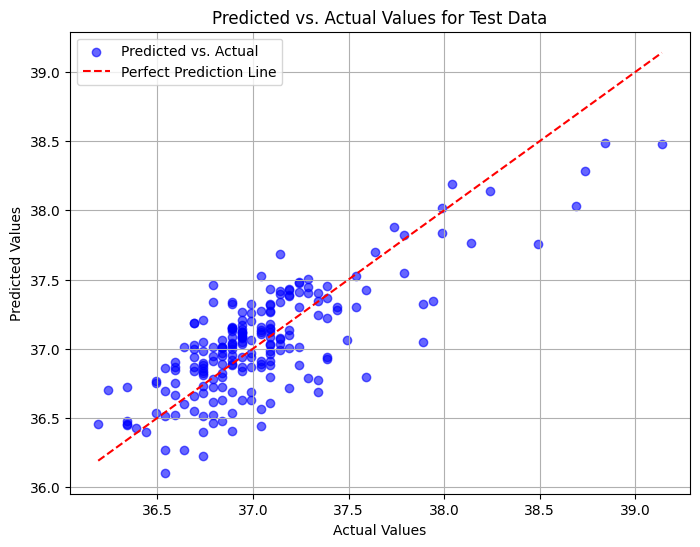

In [98]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_b_test, y_b_pred, alpha=0.6, color='b', label='Predicted vs. Actual')
plt.plot([y_b_test.min(), y_b_test.max()], [y_b_test.min(), y_b_test.max()], color='r',\
  linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values for Test Data')
plt.legend()
plt.grid(True)
plt.show()


Now the MSE has been reduced. Now the model is more reliable than the previous model.

**Q10** The Statistics

In [99]:
y_b_hat = model_b.predict(X_b_train)

# Residual Sum of Squares (RSS) 
RSS = float(((y_b_hat - y_b_train)**2).sum(axis=0).iloc[0])
print(f"RSS = {RSS}")

RSS = 77.9744908285788


In [100]:
#  Residual Standard Error (RSE)
N = y_b_train.shape[0]  # total number of data samples
print(f"Number of datapoints = {N}")

d = X_b_test.columns.shape[0] # number of independent features
print(f"Number of independent features = {d}")

RSE = (RSS / (N - d - 1))**0.5
print(f"RSE = {RSE}")

# Mean Squared Error (MSE)
MSE = RSS / N
print(f"MSE = {MSE}")

# TSS (Total Sum of Squares) : Total variance in y 
TSS = float(((y_b_train - y_b_train.mean())**2).sum(axis=0).iloc[0])
print(f"TSS = {TSS}")

R2 = (TSS - RSS)/TSS  
print(f"R2 (from direct calculations) = {R2}")

R2 = model_b.score(X_b_train, y_b_train)
print("R2 (from sklearn module) =",R2)

Number of datapoints = 814
Number of independent features = 4
RSE = 0.31045739777400483
MSE = 0.09579175777466682
TSS = 223.63911855036855
R2 (from direct calculations) = 0.6513378726673117
R2 (from sklearn module) = 0.6513378726673116


In [101]:
# Standard Error for each feature 
import statsmodels.api as sm 

# assuming you have already trained the linear regression model

# Add a constant column to the feature matrix(required by statsmodels)
X_b_train_with_constant = sm.add_constant(X_b_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_b_train, X_b_train_with_constant).fit()

# Get summary statistics of the model 
summary = ols_model.summary() 

# Extract p-values from the summary for all features 
p_values = summary.tables[1].data[1:]

# Create a DataFrame to associate p-values with feature names 
p_values_df = pd.DataFrame(p_values, columns=["Feature", "Coefficient", "Std Error", "t-value", "p-value", "Lower CI", "Upper CI"])
p_values_df["p-value"] = p_values_df["p-value"].astype(float)

print(summary)
print(p_values_df) 

                            OLS Regression Results                            
Dep. Variable:               aveOralM   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          2.11e-183
Time:                        22:23:11   Log-Likelihood:                -200.37
No. Observations:                 814   AIC:                             410.7
Df Residuals:                     809   BIC:                             434.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7936      0.801      8.486      0.0

**Q11**. Will you be able to discard any features based on p-value?

Based on the p-values we can reject the features with p-values above 5%. Therefore `T_OR1`, `T_OR_Max1`, `T_FHC_Max1` feature can be discarded

___
## 4 Performance evaluation of Linear regression

**Q1**. Consider the linear regression models Model A: $y = w_0 + w_1x_1 + w_2x_2$ and Model B: $y = w_0 + w_1x_1 + w_2x_2 + w_3x_3$. Sum of squared errors (SSE) and total sum of squares (TSS) of these models are given in Table 1. 


$
\begin{array}{|c|c|c|}
\hline
 & \textbf{Model A} & \textbf{Model B} \\
\hline
\text{SSE} = \sum_{i=1}^{N} (y_i - w^T x_i)^2 & 9 & 2 \\
\hline
\text{TSS} = \sum_{i=1}^{N} (y_i - \tilde{y})^2 & 90 & 10 \\
\hline
\text{Number of data samples (N)} & 10000 & 10000 \\
\hline
\end{array}
$

Table 1: SSE and TSS of linear regression models

**Q2**. Compute residual standard error(RSE) for models A and B. Based on RSE for which model performs better? 

$
\text{RSE}_A = \sqrt{\frac{\text{SSE}}{N - d - 1}} \ 
= \sqrt{\frac{\text{9}}{10000 - 2 - 1}}
=  0.03
$

$
\text{RSE}_B = \sqrt{\frac{\text{SSE}}{N - d - 1}} \ 
= \sqrt{\frac{\text{2}}{10000 - 3 - 1}}
=  0.0141
$



**Q3**.Compute R-squared($R^2$) for models A and B. Based on $R^2$ for which model performs better?

$
\text{R}^2_A = {\frac{\text{TSS - SSE}}{TSS}} \ 
= \frac{90 - 9}{90}
=  0.9
$

$
\text{R}^2_B = {\frac{\text{TSS - SSE}}{TSS}} \ 
= \frac{10 - 2}{10}
=  0.8
$


**Q4**. Between RSE and R-squared($R^2$), which performance metric is more fair for comparing two models and why?

$R^2$ is more fair for comparing two models. Because RSE is dependent on the number of data points. Therefore it is not fair to compare two models with different number of data points. However, $R^2$ is independent of the number of data points and it provides a relative measure of how well each model explains the variability in the data. Therefore it is fair to compare two models with different number of data points.

___
## 5 Linear regression impact on outliers

1. Linear regression is known to be less robust in the presence of outliers. To reduce the impact of outliers, a modified loss function is introduced. Suppose, following two modified functions.

$
L_1(w) = \frac{1}{N} \sum_{i=1}^{N} \frac{r_i^2}{a^2 + r_i^2} = \frac{1}{N} \sum_{i=1}^{N} L_{1,i}
$


$
L_2(w) = \frac{1}{N} \sum_{i=1}^{N}  1 - \exp{\frac{(-2|r_i|)}{a}} = \frac{1}{N} \sum_{i=1}^{N} L_{2,i}
$

Here, residual is given by $r_i = \hat {y_i} - y_i$, where $y_i $ and $\hat{y_i}=w^{T}x_i$ are true and linear regression model outputs for $i$-th data sample. Further, "$a$" ($\geq 0$) is a hyper-parameter. Figure 2 shows behavior of $L_1(w)$ and $L_2(w)$ with respect to different "$a$" values.

**Q2**. What happens when ${a \to 0}$?

- The loss goes to 1 for all iterations in $L_1(w)$ and $L_2(w)$ when ${a \to 0}$

**Q3**. Suppose we need to minimize the influence of data points with $ |r_i| \geq 40 $. What value(s) of $a$ and what function(s) would you choose, and why?

To minimize the influence of data points with the given condition, the following requirements must be satisfied:
- The impact of data points with $|r_i| \geq 40 $ should not be increased, or, if increased, it should be increased only slightly.
- The impact of data points where $ |r_i| \leq 40 $ should increase with $r_i$.

Considering both factors, I propose using the $ L_1(w) $ loss function with $a = 2.5$, as it seems to be the most suitable loss function for this case.